<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Eq_do_Contraste_(usando_pyccl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outra forma de plotar o contraste $\delta_m$ √© usar a biblioteca pyccl do Python, voltada para c√°lculos da Cosmologia. Por√©m, como esta biblioteca n√£o tem no colab, √© necess√°rio instalar atrav√©s dos comandos abaixo.

In [1]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

‚ú®üç∞‚ú® Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà/  /‚ñà‚ñà/  /‚ñà‚ñà/  /‚ñà‚ñà/  /‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ‚ñà‚ñà‚ñà‚ïó   ‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ïó   ‚ñà‚ñà‚ñà‚ïó‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïó  ‚ñà‚ñà‚ñà‚ñà‚ñà‚ïó
        ‚ñà‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïó‚ñà‚ñà‚ñà‚ñà‚ïó ‚ñà‚ñà‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïó‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïó
        ‚ñà‚ñà‚ïî‚ñà‚ñà‚ñà‚ñà‚ïî‚ñà‚ñà‚ïë‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ñà‚ñà‚ñà‚ñà‚ïî‚ñà‚ñà‚ïë‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïî‚ïù‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ïë
        ‚ñà‚ñà‚ïë‚ïö‚ñà‚ñà‚ïî‚ïù‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚ïë‚ñà‚ñà‚ïë‚ïö‚ñà‚ñà‚ïî‚ïù‚ñà‚ñà‚ïë‚ñà‚ñà‚ïî‚ïê‚ïê‚ñà‚ñà‚

In [3]:
import pyccl as ccl

In [4]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.33, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo, a)  # contraste

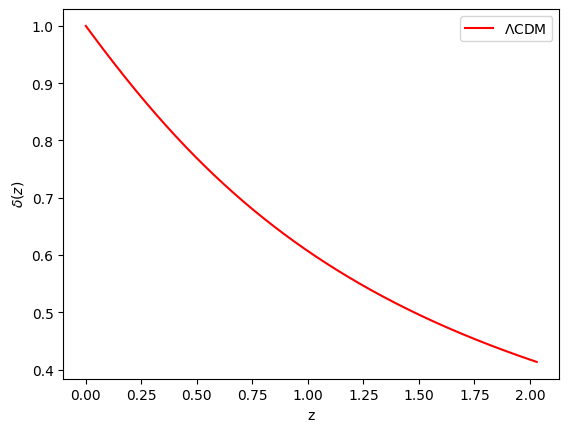

In [27]:
# definindo o redshift em fun√ß√£o do fator de escala
z = (1/a) - 1.

# plotando o gr√°fico de delta x z

plt.xlabel('z')
plt.ylabel('$\delta(z)$')
plt.plot(z, delta, color='red', label='$\Lambda$CDM')
plt.legend()
plt.show()

Por√©m, $\delta_m$ n√£o √© um observ√°vel. Como queremos comparar os modelos alternativos com dados, precisamos da fun√ß√£o $f$, defininda como:

$f(a) = \frac{d ln(\delta_m)}{d ln(a)}$.

Este par√¢metro √© um observ√°vel cosmol√≥gico e √© chamado de fun√ß√£o taxa de crescimento de estruturas.

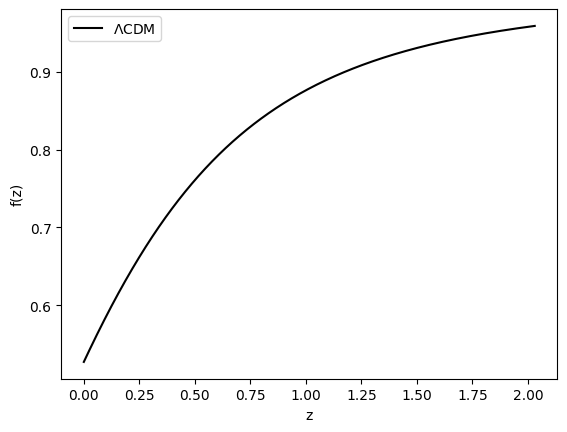

In [30]:
# definindo f com a biblioteca pyccl
f = ccl.background.growth_rate(cosmo, a)

# plotando f

plt.xlabel('z')
plt.ylabel('f(z)')
plt.plot(z, f, color='black', label='$\Lambda$CDM')
plt.legend()
plt.show()

Agora, vamos comparar a fun√ß√£o taxa de crescimento $f$ com a fun√ß√£o $g$.

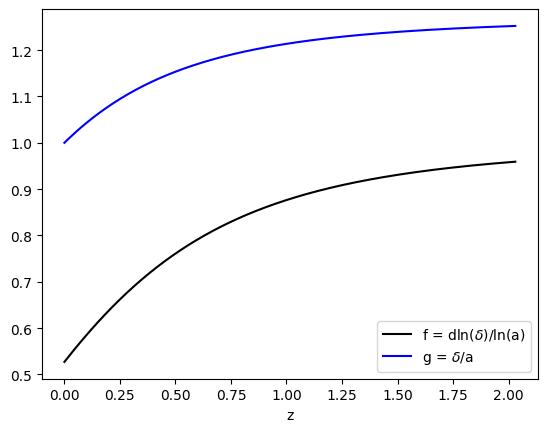

In [31]:
g = delta/a     #delta/a

plt.xlabel('z')
plt.plot(z, f, color='black', label='f = dln($\delta$)/ln(a)')
plt.plot(z, g, color='blue', label='g = $\delta$/a')
plt.legend()
plt.show()

# Vamos resolver a equa√ß√£o (1) do artigo do Linder e Cahn.

In [8]:
# definindo O_m
Om = ccl.background.omega_x(cosmo, a, 'matter')

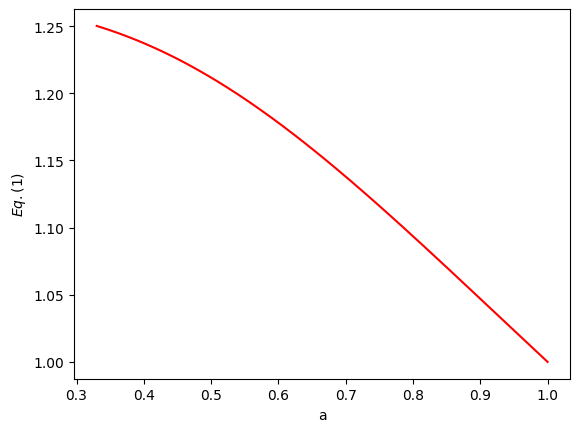

In [32]:
from scipy.integrate import cumtrapz


# vamos definir a equa√ß√£o (1) do artigo
gamma = 6./11.

I = cumtrapz(((Om ** gamma) - 1)/a, x=a, initial=0.000001)

G_a = np.exp(I)

G_a = G_a/G_a[-1]

# vamos plotar a equa√ß√£o

plt.plot(a, G_a, color='red')
plt.xlabel('a')
plt.ylabel('$Eq. (1)$')
plt.show()

# Agora, vamos plotar g = $\delta$/a.

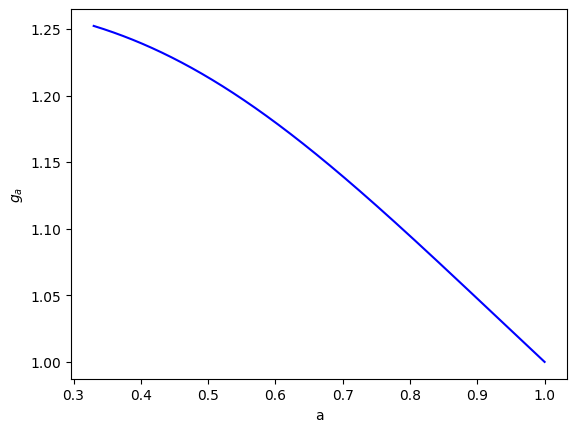

In [33]:
# vamos plotar delta/a

plt.plot(a, g, color='blue')
plt.xlabel('a')
plt.ylabel('$g_a$')
plt.show()

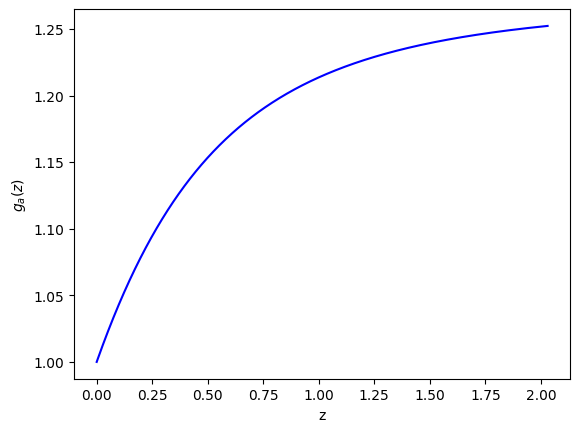

In [34]:
# vamos plotar delta/a

plt.plot(z, g, color='blue')
plt.xlabel('z')
plt.ylabel('$g_a(z)$')
plt.show()

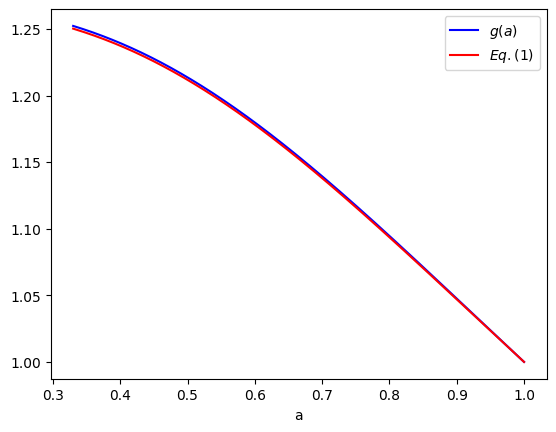

In [35]:

plt.plot(a, g, color='blue', label='$g(a)$')
plt.plot(a, G_a, color='red', label='$Eq. (1)$')
plt.xlabel('a')
plt.legend()
plt.show()

# Agora, vamos calcular a diferen√ßa entre as curvas.

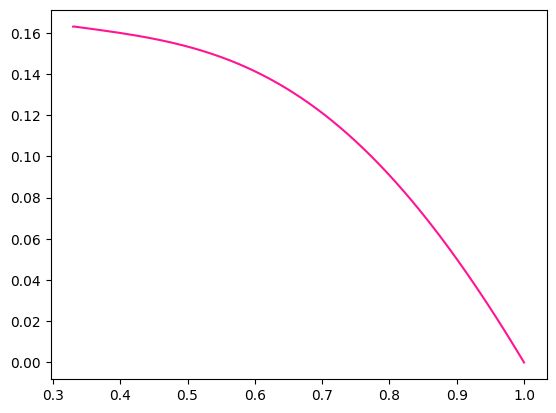

In [36]:
dif = abs((G_a - g)/g) * 100


plt.plot(a, dif, color='deeppink')
plt.show()

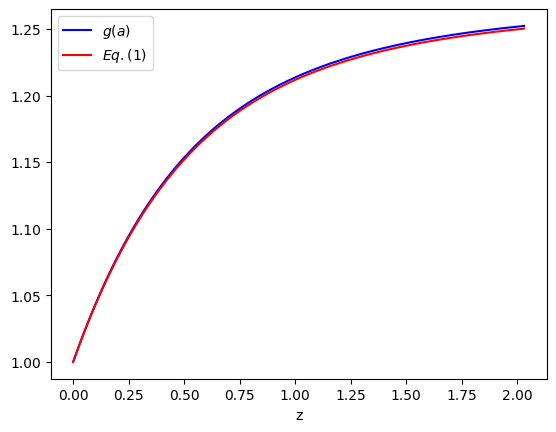

In [37]:

plt.plot(z, g, color='blue', label='$g(a)$')
plt.plot(z, G_a, color='red', label='$Eq. (1)$')
plt.xlabel('z')
plt.legend()
plt.show()

Agora, vamos plotar $G(a) = \frac{d ln(\delta/a)}{d ln (a)}$ x $z$.

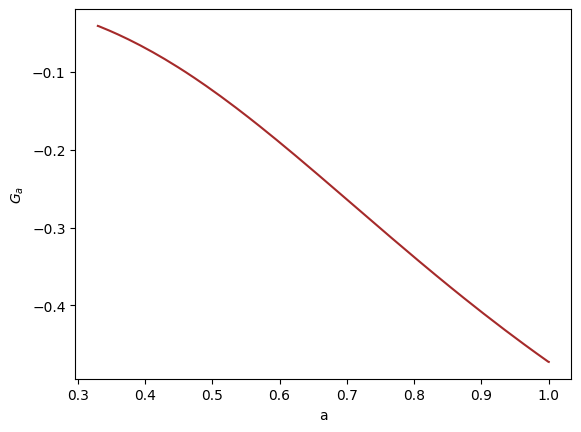

In [15]:
# definindo G(a)
g = delta/a 
x = np.log(a)
y = np.log(g)

dy_dx = np.gradient(y, x)

plt.plot(a, dy_dx, color='brown')
plt.xlabel('a')
plt.ylabel('$G_a$')
plt.show()

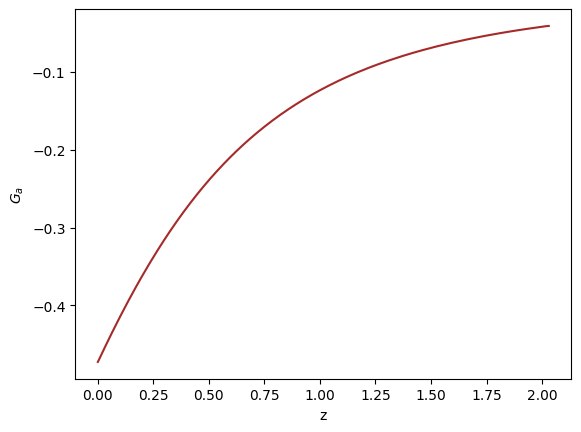

In [16]:
plt.plot(z, dy_dx, color='brown')
plt.xlabel('z')
plt.ylabel('$G_a$')
plt.show()

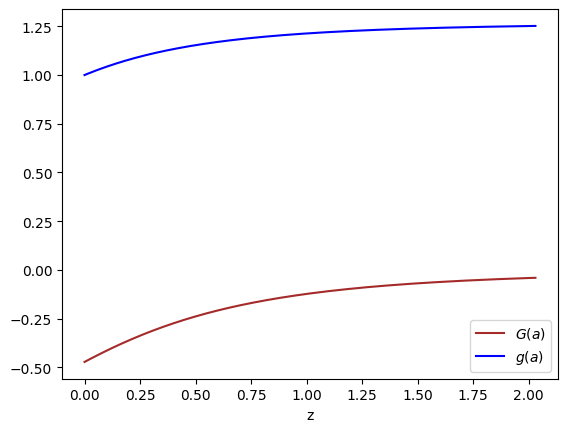

In [17]:
plt.plot(z, dy_dx, color='brown', label='$G(a)$')
plt.plot(z, g, color='blue', label='$g(a)$')
plt.xlabel('z')
plt.legend()
plt.show()

Vamos fazer o plot da equa√ß√£o (8) do artigo de Linder e Cahn e compar√°-la com $g(a)$. A equa√ß√£o (8) √©:

$G(a) = \Omega_m(a) ^\gamma - 1$

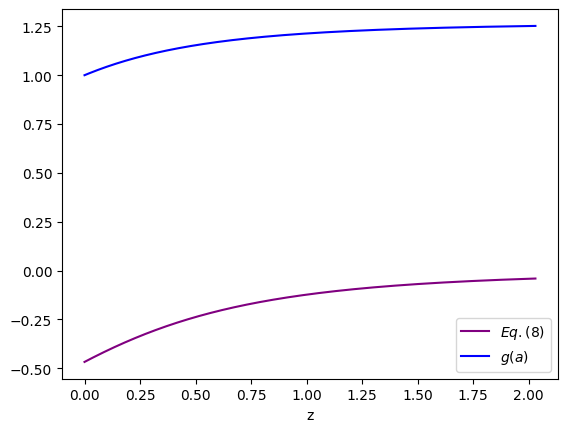

In [18]:
G8 = Om**gamma - 1

plt.plot(z, G8, color='purple', label='$Eq. (8)$')
plt.plot(z, g, color='blue', label='$g(a)$')
plt.xlabel('z')
plt.legend()
plt.show()

A equa√ß√£o (4) de Linder e Cahn √©:

$G(a) = - 1 + [a^4 H(a)]^{-1} \int_0^a \frac{da'}{a'} a'^4 H(a') [1 + \frac{3}{2} \Omega_m(a') - G^2 (a')]$,

Vamos plotar a equa√ß√£o (4) de Linder e Cahn, desconsiderando o termo $G^2$, ou seja, vamos plotar:

$G(a) = - 1 + [a^4 H(a)]^{-1} \int_0^a \frac{da'}{a'} a'^4 H(a') [1 + \frac{3}{2} \Omega_m(a')]$,

em que:

$H^2/H_0 ^2 = \Omega_m a^{-3}[1 + \Omega_\omega(a)/\Omega_m(a)]$.

No modelo $\Lambda$CDM:

$\Omega_\omega = 1 - \Omega_m$.

Logo:

$H = \frac{H_0}{a^{3/2}}$.

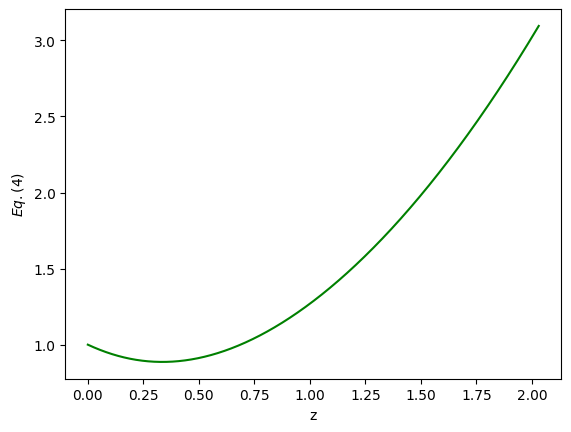

In [19]:
# constante
h0 = 70 # km/s/Mpc

# definindo H
H = h0/(a**(3/2))

# definindo a integral
I1 = cumtrapz(((a**3)*H*(1+(3/2)*Om)), x=a, initial=0.000001)

G4 = - 1 + (1/((a**4)*H))*I1

G4 = G4/G4[-1]

# vamos plotar a equa√ß√£o
#plt.figure(figsize=(8, 6))
plt.plot(z, G4, color='green')
plt.xlabel('z')
plt.ylabel('$Eq. (4)$')
plt.show()

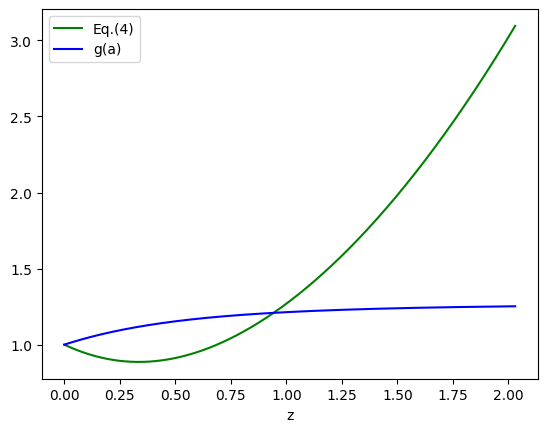

In [20]:
#plt.figure(figsize=(8, 6))
plt.plot(z, G4, color='green', label='Eq.(4)')
plt.plot(z, g, color='blue', label='g(a)')
plt.xlabel('z')
plt.legend()
plt.show()

Vamos plotar a equa√ß√£o (5) do artigo de Linder e Cahn, dada por:

$G(a) = - 1 + [a^4 H(a)]^{-1} \int_0^a \frac{da'}{a'} a'^4 H(a') [\frac{5}{2} - \frac{3}{2} \Omega_\omega(a')]$.

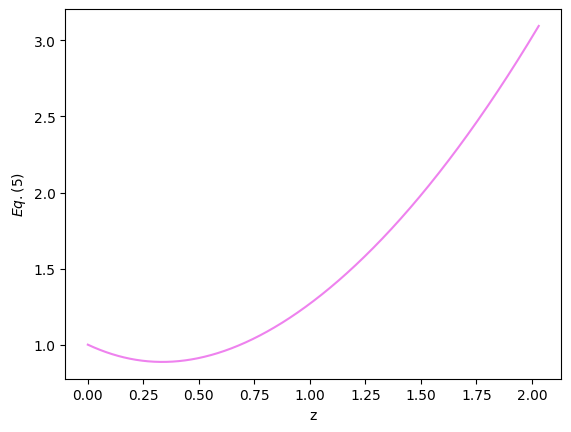

In [21]:
# definindo Ow
Ow = 1 - Om

# definindo a integral
I2 = cumtrapz(((a**3)*H*((5/2) - (3/2)*Ow)), x=a, initial=0.000001)

G5 = - 1 + (1/((a**4)*H))*I2

G5 = G5/G5[-1]

# vamos plotar a equa√ß√£o
#plt.figure(figsize=(8, 6))
plt.plot(z, G5, color='violet')
plt.xlabel('z')
plt.ylabel('$Eq. (5)$')
plt.show()

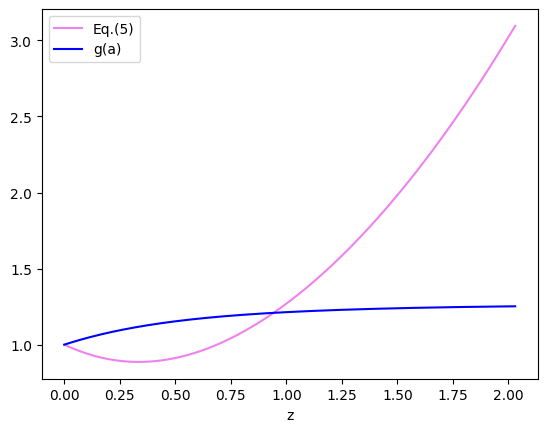

In [22]:
#plt.figure(figsize=(8, 6))
plt.plot(z, G5, color='violet', label='Eq.(5)')
plt.plot(z, g, color='blue', label='g(a)')
plt.xlabel('z')
plt.legend()
plt.show()

Vamos plotar a equa√ß√£o (7) do artigo de Linder e Cahn, dada por:

$G(a) = - \frac{1}{2}\Omega_\omega(a) - \frac{1}{4} a^{-5/2} \int_0^a \frac{da'}{a'} a'^{5/2} \Omega_\omega(a') $.

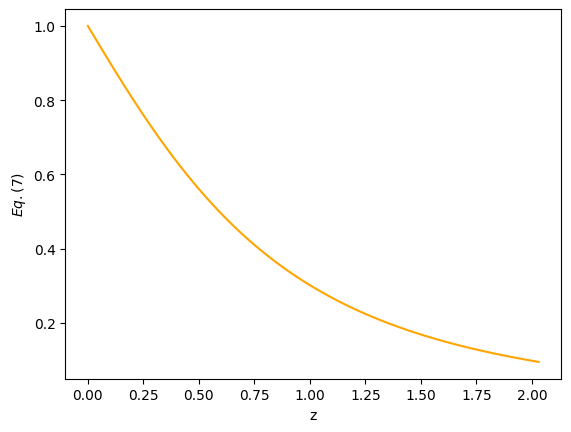

In [23]:
# definindo a integral
I3 = cumtrapz( (a**(3/2)*Ow), x=a, initial=0.000001)

G7 = - (1/2)*Ow - (1/4) * (a**(-5/2)) * I3

G7 = G7/G7[-1]

# vamos plotar a equa√ß√£o
#plt.figure(figsize=(8, 6))
plt.plot(z, G7, color='orange')
plt.xlabel('z')
plt.ylabel('$Eq. (7)$')
plt.show()

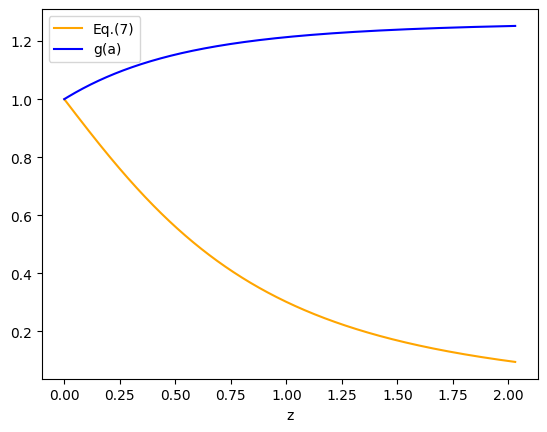

In [24]:
#plt.figure(figsize=(8, 6))
plt.plot(z, G7, color='orange', label='Eq.(7)')
plt.plot(z, g, color='blue', label='g(a)')
plt.xlabel('z')
plt.legend()
plt.show()